# Tehtävä 0.
## Aihe: Ympäristön pystytys

Luo ohjelmointiympäristö asentamalla syväoppimiseen tarvittavat kirjastot. Seuraa materiaaleista otsikon "Ympäristön pystytys" - alla olevat ohjeet.

Kun olet asentanut kirjastot, aja alla oleva solu. Jos ei tule virheitä, niin ympäristösi on asennettu oikein.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

print(tf.__version__) # Pitäisi tulostaa tensorflow 2.0 tai uudempi versio

2.3.0


Jos olet asentanut Tensorflowin GPU eli näytönohjainversion, aja alla oleva solu. Solun pitäisi tulostaa listan laskentaan saatavilla olevista näytönohjaimista. Jos näytönohjaimia ei löydy, solu tulostaa tyhjän listan. 

Jos et käytä Tensorflowin GPU versiota, voit jättää solun ajamatta tai kommentoida funktion pois.

In [13]:
#tf.config.list_physical_devices('GPU')

# Tehtävä 1
### Aihe: Datan esikäsittely ja ohjattu oppiminen
3,3 pistettä

1. Katso diabetes - datasetin tiedot Kagglesta https://www.kaggle.com/uciml/pima-indians-diabetes-database ja lataa "likainen" versio datasetistä data - kansiosta *diabetes_messy.csv* tiedostosta.

2. Lataa csv-tiedosto Pandas DataFrameen, suorita seuraavat datan siivoamisoperaatiot:
    * Pudota NaN rivit.
    * Pudota identtiset rivit.
    * Korvaa suuresti poikkeavat arvot sarakkeen mediaanilla. (Vinkki: Visualisoi sarakkeiden arvot)

3. Tutki numeraalisissa sarakkeissa nolla-arvojen määrän suhdetta kaikkiin arvoihin. Jos nolla-arvoja on 20% tai enemmän, pudota koko sarake datasetistä.

4. Skaalaa datasetti käyttäen standardisointia tai minimi-maksimi skaalausta.

5. Muuta datasetti valvotun oppimisen muotoon, eli erottele data ominaisuuksiin ja ennustettaviin arvoihin.
    * Ennustettava arvo on tässä datasetissä Diabetes - sarake, ominaisuudet ovat kaikki muut sarakkeet.

6. Jaa datasetti koulutus- ja testidatasettiin, niin että koulutusdatasetissä on 80% datasetistä ja testidatasetissä 20%. 

7. Aja "Tehtävän vastaukset" solu, jossa todistetaan, että DataFrame on siivottu ja valmis koneoppimisen malleille:
    * Ei identtisiä rivejä (Funktion df.duplicated().any().sum() tulos on 0)
    * Ei NaN rivejä (Funktion df.isna().any().sum() tulos on 0)
    * Koulutus- ja testidatasetin jako on 80%/20%

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/diabetes_messy.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.dropna(inplace=True) # Pudota NaN rivit
df.drop_duplicates(keep='first', inplace=True) # Pudota identtiset rivit

#fig, ax = plt.subplots()
#ax.plot(df['Age'])
#plt.show()

# korvaa suuresti poikkeavat arvot sarakkeen mediaanilla.
df.loc[df['Pregnancies'] >= 100, 'Pregnancies'] = np.nan  
df['Pregnancies'].fillna(df['Pregnancies'].median(), inplace=True)
df.loc[df['SkinThickness'] >= 70, 'SkinThickness'] = np.nan  
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df.loc[df['Age'] >= 100, 'Age'] = np.nan  
df['Age'].fillna(df['Age'].median(), inplace=True)

# rivien määrä sarakkeissa
number_of_rows = len(df.index)

# jos nolla-arvoja on 20% tai enemmän, sarake pudotetaan
for column in df:
    if column =="Outcome":
        continue
    if (((df[column] == 0).sum())/number_of_rows)*100 >= 20:
        df = df.drop(column, axis=1)

# skaalaa datasetti käyttäen standardisointia
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df = pd.DataFrame(df)

# muuta datasetti valvotun oppimisen muotoon, eli erottele data ominaisuuksiin ja ennustettaviin arvoihin
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

# jaa datasetti koulutus- ja testidatasettiin, niin että koulutusdatasetissä on 80% datasetistä ja testidatasetissä 20%
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)

#print(df.head(50))

In [18]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita muokkaamasi dataframe df - muuttujaan.
print("Amount of NaN rows in dataframe: ",df.isna().any().sum())
print("Amount of duplicate rows in dataframe: ",df.duplicated().any().sum())
print("Training dataset length: ", len(train_X))
print("Test dataset length: ",len(test_X))

Amount of NaN rows in dataframe:  0
Amount of duplicate rows in dataframe:  0
Training dataset length:  614
Test dataset length:  154


# Tehtävä 2.
### Aihe: Neuroverkko käsin
3,3 pistettä

Alla on määritelty koordinaattipareja, joiden avulla on piirretty kahta eri värisiä pisteitä. Tavoitteena on luoda neuroverkko, joka jakaa kuvaajan siniseen ja punaiseen alueeseen. Kun kuvaajaan piirretään uusi piste ja pisteen koordinaatit syötetään neuroverkolle, neuroverkon ennuste kertoo sen, minkä värinen piste on.

Katso materiaaleista, miten luot neuroverkon käsin käyttäen NumPy - kirjaston taulukoita ja funktioita. 

1. Luo koulutusdatasetti koordinaattipisteet ja värit ominaisuuksiin ja ennustettaviin arvoihin.
2. Luo neuroverkkoluokka, jonka rakenne on:
    * Sisääntulokerros, jossa on kaksi neuronia
    * Yksi piiloitettua kerros, jossa on 6 neuronia ja aktivaatiofunktiona sigmoid.
    * Ulostulokerros, jossa yksi neuroni ja aktivaatiofunktiona sigmoid.
3. Luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (forwardpropagation) ja päivität yhteyksien painoarvoja virheen avulla (backpropagation)
4. Syötä koulutusdatasetti 1000 kertaa neuroverkon läpi.
    * Syötä jokaisella kierroksella koulutusdata rivi riviltä neuroverkon läpi ja päivitä painoarvot.
    * Tallenna kierroksen aikana virheet jokaiselle syötölle, ja lisää kierroksen virheistä keskiarvo listaan. Piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana
5. Ennusta neuroverkolla, minkä värinen on piste: [0.1,-5.8]
6. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Piirrä neuroverkon rakenne piirrustusohjelmalla tai paperille, näät silloin yhteyksien määrän jokaisessa kerroksessa.
* Käytä olemassa olevaa ratkaisua materiaaleista, lisää siihen tarvittavat laskut jokaiselle kerrokselle.

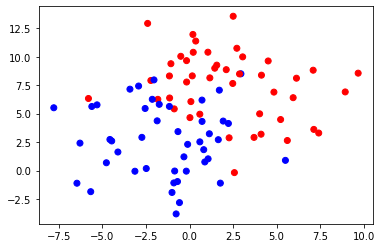

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dots, labels = make_blobs(n_samples=90,centers=2,cluster_std = 3,center_box=(-8,8),random_state=131)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:,0],dots[:,1],color=colors)

Neuroverkon ennuste ensimmäiselle syötteelle: [0.95663409] Neuroverkon virhe: [0.45757439]
Epoch 100 Loss: [0.0558732]
Epoch 200 Loss: [0.04397464]
Epoch 300 Loss: [0.04029307]
Epoch 400 Loss: [0.03697165]
Epoch 500 Loss: [0.0327314]
Epoch 600 Loss: [0.02928247]
Epoch 700 Loss: [0.02660436]
Epoch 800 Loss: [0.0244337]
Epoch 900 Loss: [0.0226303]
Epoch 1000 Loss: [0.02110974]


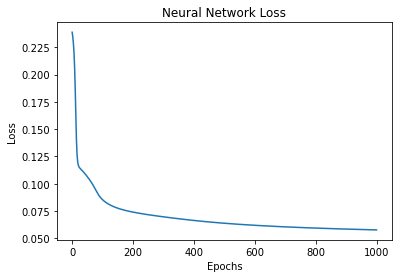

In [25]:
# Tehtävän toteutus jatkuu tästä
import numpy as np

# luo koulutusdatasetti koordinaattipisteet ja värit ominaisuuksiin ja ennustettaviin arvoihin
train_X = dots
train_y = labels

# luo neuroverkkoluokka, jonka rakenne on:
# sisääntulokerros, jossa on kaksi neuronia
# yksi piiloitettua kerros, jossa on 6 neuronia ja aktivaatiofunktiona sigmoid.
# ulostulokerros, jossa yksi neuroni ja aktivaatiofunktiona sigmoid.

class NeuralNetwork:
    def __init__(self):
        # Alustetaan painoarvot satunaisesti
        self.weights1 = np.random.rand(2,6)
        self.weights2 = np.random.rand(6,1)
        
    # Virhefunktio
    def loss_function(self,true,prediction):
        return 0.5 * (true - prediction)**2
    
    # Virhefunktion derivaatta
    def loss_function_derivative(self,true,prediction):
        return true - prediction
    
    # Sigmoid funktio
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Sigmoidin derivaatta
    def sigmoid_derivative(self,x):
        return x * (1 - x)
    
    # Syöte neuroverkon kerrosten läpi
    def forwardpropagation(self,X,y):
        # Määritetään ominaisuudet ja halutut arvot NumPy - taulukoiksi sekä lasketaan kerrosten ulostulot
        self.X = np.array([X])
        self.y = np.array([y])
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))
        self.loss = self.loss_function(self.y, self.output)
    
    # Painoarvojen päivitys backpropagation - menetelmällä
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)
        
        self.weights2 += learning_rate * weights2_adjustment
        self.weights1 += learning_rate * weights1_adjustment
        
        
# luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (forwardpropagation) ja päivität yhteyksien 
# painoarvoja virheen avulla (backpropagation)        
neural_network = NeuralNetwork()
neural_network.forwardpropagation(train_X[0],train_y[0])
print(f"Neuroverkon ennuste ensimmäiselle syötteelle: {neural_network.output[0]} Neuroverkon virhe: {neural_network.loss[0]}")
neural_network.backpropagation(learning_rate = 0.01)

# syötä koulutusdatasetti 1000 kertaa neuroverkon läpi
epoch_losses = []
epochs = 1000
for epoch in range(1,epochs+1):
    batch_losses = [] # Lista, johon lisätään yhden kierroksen virhearvot
    for X,y in zip(train_X,train_y):
        neural_network.forwardpropagation(X,y)
        neural_network.backpropagation(learning_rate = 0.01)
        batch_losses.append(neural_network.loss[0])
    epoch_losses.append(np.average(batch_losses)) # Otetaan keskiarvo yhden kierroksen virhearvoista
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {neural_network.loss[0]}")
        
# piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana        
fig, ax = plt.subplots()
ax.plot(epoch_losses)
ax.set_title("Neural Network Loss")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.show()

#ennusta neuroverkolla, minkä värinen on piste: [0.1,-5.8]
test_X = np.array([[0.1,-5.8]])
layer1_output = neural_network.sigmoid(np.dot(test_X, neural_network.weights1))
output = neural_network.sigmoid(np.dot(layer1_output, neural_network.weights2))

In [26]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita output - muuttujaan neuroverkon ennuste syötölle [0.1,-5.8]
print(output)

[[0.97456477]]


# Tehtävä 3
### Aihe: Yksinkertainen neuroverkko Keras Sequential API:lla
3,3 pistettä

Koulutetaan yksinkertainen neuroverkko Kerassilla käyttäen tehtävässä 1 puhdistettua diabetes datasettiä. (Jos tehtävän teko ei onnistunut, lataa datasetti Kagglesta)

Tehtävästä on löydyttävä vaiheet:
1. Luo neuroverkko (käytä tf.keras.Sequential() funktiota)
2. Määritä häviöfunktio ja optimisaattori (käytä model.compile() funktiota)
3. Kouluta neuroverkko (käytä model.fit() funktiota)
4. Vertaa neuroverkon ennustuksia testidataan (käytä model.evaluate() funktiota)
5. Aja "Tehtävän vastaukset" solu

In [18]:
# Tehtävän toteutus
import tensorflow as tf
tf.keras.backend.set_floatx('float64')
from tensorflow import keras

# muuta datasetti valvotun oppimisen muotoon, eli erottele data ominaisuuksiin ja ennustettaviin arvoihin
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

# jaa datasetti koulutus- ja testidatasettiin, niin että koulutusdatasetissä on 80% datasetistä ja testidatasetissä 20%
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)
train_X, test_X, train_y, test_y = train_test_split(df.drop('Outcome',axis=1).values, df['Outcome'].values,
test_size=0.2,
stratify=y)

keras.backend.clear_session()

# luo neuroverkko (käytä tf.keras.Sequential() funktiota)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# määritä häviöfunktio ja optimisaattori (käytä model.compile() funktiota)
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# kouluta neuroverkko (käytä model.fit() funktiota)
model.fit(train_X, train_y, epochs=5)

# vertaa neuroverkon ennustuksia testidataan (käytä model.evaluate() funktiota)
results = model.evaluate(test_X, test_y)

Epoch 1/5
20/20 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6368
Epoch 2/5
20/20 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.6515
Epoch 3/5
20/20 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.6580
Epoch 4/5
20/20 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.6743
Epoch 5/5
5/5 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.7143


In [19]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.5708365978358628 Test Accuracy:71.42857142857143%
